In [1]:
import pandas as pd

In [2]:

!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 6.8 MB/s 
     |████████████████████████████████| 182 kB 70.1 MB/s 
     |████████████████████████████████| 7.6 MB 52.7 MB/s 


In [3]:
!pip install pytorch-pretrained-bert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 123 kB 6.1 MB/s 
     |████████████████████████████████| 132 kB 50.2 MB/s 
     |████████████████████████████████| 10.2 MB 69.1 MB/s 
     |████████████████████████████████| 79 kB 8.2 MB/s 
     |████████████████████████████████| 140 kB 61.4 MB/s 
     |████████████████████████████████| 127 kB 53.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [4]:
# from google.colab import files
# uploaded = files.upload()

In [5]:
path = "metadata_allvisits.csv"
df = pd.read_csv(path, sep=",")

In [6]:
df

,filepath,age,gender,mmse,pause1,pause2,pause3,count_unintelligible,count_trailing,count_repetitions,category,data
0,002-0.cha,58.0,female,30.0,0,0,0,0,0,2,Control,the scene is in the in the kitchen . the moth...
1,002-1.cha,59.0,female,30.0,0,0,0,1,0,0,Control,oh I see the sink is running over . I see the...
2,002-2.cha,60.0,female,30.0,0,0,0,0,0,1,Control,a boy and a girl are in the kitchen with thei...
3,002-3.cha,61.0,female,28.0,0,0,0,0,0,1,Control,it was summertime and mother and the childre...
4,006-2.cha,72.0,male,NaN,0,0,0,0,0,0,Control,wait until I put my glasses on . oh ‡ there's...
...,...,...,...,...,...,...,...,...,...,...,...,...
547,704-0.cha,50.0,male,23.0,0,0,0,0,0,0,Other,well the little kid's falling off his chair ....
548,705-0.cha,71.0,female,13.0,2,0,0,0,1,1,ProbableAD,well this one is in the cookie jar . and thi...
549,707-0.cha,74.0,female,21.0,0,0,0,0,0,0,PossibleAD,the little boy is on the stool which is tipp...
550,711-0.cha,77.0,male,25.0,0,0,0,0,1,1,PossibleAD,oh you want me to tell you . the mother and h...


In [7]:
df.fillna(value='', inplace=True)

In [8]:
cols = df.select_dtypes(include=['object'])
for col in cols.columns.values:
    df[col] = df[col].fillna('')

In [9]:
df.dropna()

,filepath,age,gender,mmse,pause1,pause2,pause3,count_unintelligible,count_trailing,count_repetitions,category,data
0,002-0.cha,58.0,female,30.0,0,0,0,0,0,2,Control,the scene is in the in the kitchen . the moth...
1,002-1.cha,59.0,female,30.0,0,0,0,1,0,0,Control,oh I see the sink is running over . I see the...
2,002-2.cha,60.0,female,30.0,0,0,0,0,0,1,Control,a boy and a girl are in the kitchen with thei...
3,002-3.cha,61.0,female,28.0,0,0,0,0,0,1,Control,it was summertime and mother and the childre...
4,006-2.cha,72.0,male,,0,0,0,0,0,0,Control,wait until I put my glasses on . oh ‡ there's...
...,...,...,...,...,...,...,...,...,...,...,...,...
547,704-0.cha,50.0,male,23.0,0,0,0,0,0,0,Other,well the little kid's falling off his chair ....
548,705-0.cha,71.0,female,13.0,2,0,0,0,1,1,ProbableAD,well this one is in the cookie jar . and thi...
549,707-0.cha,74.0,female,21.0,0,0,0,0,0,0,PossibleAD,the little boy is on the stool which is tipp...
550,711-0.cha,77.0,male,25.0,0,0,0,0,1,1,PossibleAD,oh you want me to tell you . the mother and h...


In [10]:
df.drop(['mmse'], axis=1,inplace=True)
df.drop(['filepath'], axis=1,inplace=True)

In [11]:
df.isna().any()[lambda x: x]

Series([], dtype: bool)

In [12]:
df['category']

0         Control
1         Control
2         Control
3         Control
4         Control
          ...    
547         Other
548    ProbableAD
549    PossibleAD
550    PossibleAD
551    PossibleAD
Name: category, Length: 552, dtype: object

In [13]:
df.isnull().sum()

age                     0
gender                  0
pause1                  0
pause2                  0
pause3                  0
count_unintelligible    0
count_trailing          0
count_repetitions       0
category                0
data                    0
dtype: int64

In [14]:
df.dropna(inplace = True)

In [15]:
for j in range(len(df)):
    if df.iloc[j,8] == "Control":
               df.iloc[j,8]=0
    else:
               df.iloc[j,8]=1
      


In [16]:
df["category"]

0      0
1      0
2      0
3      0
4      0
      ..
547    1
548    1
549    1
550    1
551    1
Name: category, Length: 552, dtype: object

Preprocess data
1. Clean data

In [17]:
import string
import re

In [18]:
table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
string_punctuation_1 = string.punctuation.replace(".","").replace("`","").replace("'","")
table_ = str.maketrans(string_punctuation_1, ' '*len(string_punctuation_1))
printable = set(string.printable)


def clean_data(text):
    
    sentence = text.lower()
    sentence_no_punct = sentence.translate(table_)
    space_remove = re.sub('\s+',' ', sentence_no_punct)
    return space_remove

In [19]:
df['Transcripts_cleaned'] = df['data'].apply(lambda row: clean_data(row) )

In [20]:
df['Transcripts_cleaned'].iloc[0] , df['category'].iloc[0]

(" the scene is in the in the kitchen . the mother is wiping dishes and the water is running on the floor . a child is trying to get a boy is trying to get cookies outta out a jar and he's about to tip over on a stool . the little girl is reacting to his falling . it seems to be summer out . the window is open . the curtains are blowing . it must be a gentle breeze . there's grass outside in the garden . mother's finished certain of the the dishes . kitchen's very tidy . the mother seems to have nothing in the house to eat except cookies in the cookie jar . the children look to be almost about the same size . perhaps they're twins . they're dressed for summer warm weather . you want more the mother's in a short sleeve dress . i'll hafta say it's warm . ",
 0)

In [21]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [22]:
sentences = df['Transcripts_cleaned'].values
labels = df.category.values

In [23]:
import numpy as np

In [24]:
max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (598 > 512). Running this sequence through the model will result in indexing errors


Max sentence length:  598


In [25]:
import tensorflow as tf
import torch

In [26]:
input_ids = []
attention_masks = []

for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = np.array(labels).astype('float32')
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:   the scene is in the in the kitchen . the mother is wiping dishes and the water is running on the floor . a child is trying to get a boy is trying to get cookies outta out a jar and he's about to tip over on a stool . the little girl is reacting to his falling . it seems to be summer out . the window is open . the curtains are blowing . it must be a gentle breeze . there's grass outside in the garden . mother's finished certain of the the dishes . kitchen's very tidy . the mother seems to have nothing in the house to eat except cookies in the cookie jar . the children look to be almost about the same size . perhaps they're twins . they're dressed for summer warm weather . you want more the mother's in a short sleeve dress . i'll hafta say it's warm . 
Token IDs: tensor([  101,  1996,  3496,  2003,  1999,  1996,  1999,  1996,  3829,  1012,
         1996,  2388,  2003, 14612, 10447,  1998,  1996,  2300,  2003,  2770,
         2006,  1996,  2723,  1012,  1037,  2775,  2003,  26

In [27]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
# val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size,test_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))
print('{:>5,} test samples'.format(test_size))

  441 training samples
   55 validation samples
   56 test samples


In [28]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )
test_dataloader = DataLoader(
            test_dataset, # The validation samples.
            sampler = SequentialSampler(test_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [29]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [30]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [31]:

optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [32]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 8

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [33]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [34]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [35]:
device = torch.device("cuda")

In [36]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()
# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()
    # print(train_dataloader)
    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        b_labels=torch.stack((b_labels,b_labels))
        b_labels=b_labels.T
        # print("a",b_input_ids,b_input_ids.shape)
        # print("b",b_input_mask,b_input_mask.shape)
        # print("c",b_labels,b_labels.shape)
        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        print("devesh")

        test = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)
        # print("loss",test.loss)
        loss=test.loss
        logits=test.logits
        print(test.loss.item())
        # print("logits",type(loss))

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        b_labels=torch.stack((b_labels,b_labels))
        b_labels=b_labels.T
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).

        with torch.no_grad():        

        #     # Forward pass, calculate logit predictions.
        #     # token_type_ids is the same as the "segment ids", which 
        #     # differentiates sentence 1 and 2 in 2-sentence tasks.
        #     # The documentation for this `model` function is here: 
        #     # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        #     # Get the "logits" output by the model. The "logits" are the output
        #     # values prior to applying an activation function like the softmax.
        
          test = model(b_input_ids, 
                                  token_type_ids=None, 
                                  attention_mask=b_input_mask,
                                  labels=b_labels)
          loss=test.loss
          logits=test.logits
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 8 ========
Training...
devesh
0.7160589098930359
devesh
0.6769559383392334
devesh
0.7198070287704468
devesh
0.693672776222229
devesh
0.6889592409133911
devesh
0.6821670532226562
devesh
0.6695387363433838
devesh
0.6677145957946777
devesh
0.6515576839447021
devesh
0.6160202026367188
devesh
0.70264732837677
devesh
0.6854288578033447
devesh
0.7058937549591064
devesh
0.6809084415435791

  Average training loss: 0.68
  Training epcoh took: 0:00:08

Running Validation...
  Accuracy: 0.00
  Validation Loss: 0.69
  Validation took: 0:00:00

======== Epoch 2 / 8 ========
Training...
devesh


<ipython-input-33-9579c51a58cd>:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  return np.sum(pred_flat == labels_flat) / len(labels_flat)


0.6712018251419067
devesh
0.6725509762763977
devesh
0.6491615772247314
devesh
0.662495493888855
devesh
0.6462762355804443
devesh
0.6650130748748779
devesh
0.6324812173843384
devesh
0.616500735282898
devesh
0.642055869102478
devesh
0.6044942140579224
devesh
0.5875746011734009
devesh
0.593826174736023
devesh
0.5642392635345459
devesh
0.5497294068336487

  Average training loss: 0.63
  Training epcoh took: 0:00:04

Running Validation...
  Accuracy: 0.00
  Validation Loss: 0.63
  Validation took: 0:00:00

======== Epoch 3 / 8 ========
Training...
devesh
0.5917974710464478
devesh
0.5842306613922119
devesh
0.585943341255188
devesh
0.4982048273086548
devesh
0.5124529004096985
devesh
0.5990087985992432
devesh
0.6614809036254883
devesh
0.7465677857398987
devesh
0.4925283193588257
devesh
0.5621023178100586
devesh
0.6601197123527527
devesh
0.49730977416038513
devesh
0.46784043312072754
devesh
0.48622506856918335

  Average training loss: 0.57
  Training epcoh took: 0:00:04

Running Validation...


In [37]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats


,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.68,0.69,0.0,0:00:08,0:00:00
2,0.63,0.63,0.0,0:00:04,0:00:00
3,0.57,0.59,0.0,0:00:04,0:00:00
4,0.52,0.59,0.0,0:00:04,0:00:00
5,0.48,0.55,0.0,0:00:04,0:00:00
6,0.45,0.53,0.0,0:00:04,0:00:00
7,0.42,0.56,0.0,0:00:04,0:00:00
8,0.39,0.55,0.0,0:00:04,0:00:00


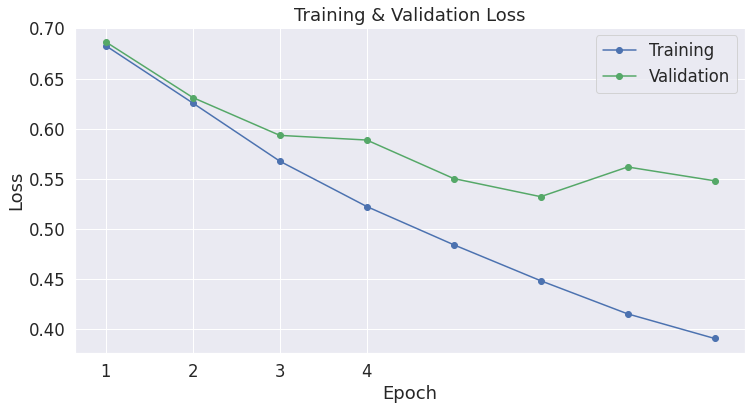

In [38]:
import matplotlib.pyplot as plt
# % matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

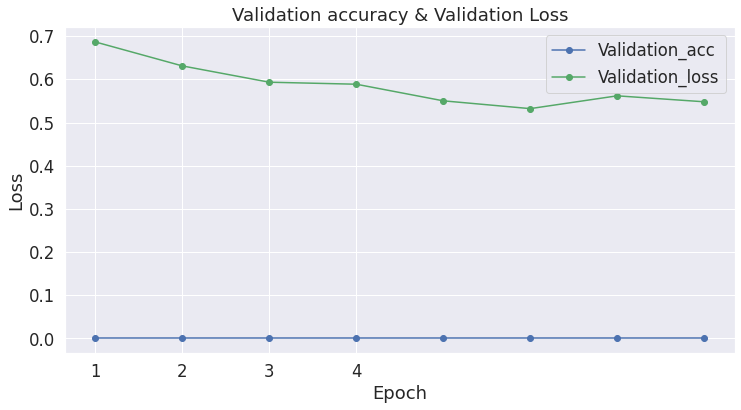

In [39]:
import matplotlib.pyplot as plt
# % matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Valid. Accur.'], 'b-o', label="Validation_acc")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation_loss")

# Label the plot.
plt.title("Validation accuracy & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [40]:

import torch.nn.functional as F
# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []
prediction_probs = []
# Predict 
for batch in test_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)
  _, preds = torch.max(outputs[0], dim=1)
  logits = outputs[0]
  predictions.extend(preds)
  prediction_probs.extend(outputs[0])
  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  #label_ids = b_labels.to('cpu').numpy()
  # Store predictions and true labels
  #predictions.append(logits)
  true_labels.extend(b_labels)
predictions = torch.stack(predictions).cpu()
prediction_probs = torch.stack(prediction_probs).cpu()
true_labels = torch.stack(true_labels).cpu()
# all_logits = torch.cat(all_logits, dim=0)
# probs = F.softmax(all_logits, dim=1).cpu().numpy()

print('    DONE.')

    DONE.


In [41]:
true_labels

tensor([0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
        0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
        0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0.])

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.metrics import roc_curve , roc_auc_score, auc

def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

AUC: 0.7695
Accuracy: 69.64%


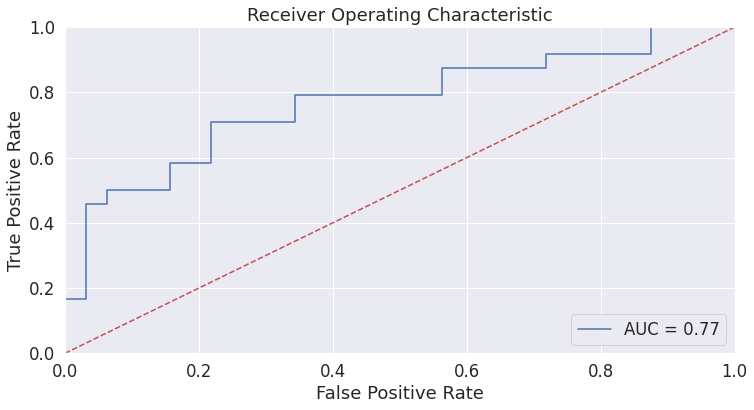

In [43]:
evaluate_roc(prediction_probs , true_labels)

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.metrics import roc_curve , roc_auc_score


labels = [0, 1]
print(accuracy_score(true_labels, predictions))
print(confusion_matrix(true_labels, predictions))
print(precision_recall_fscore_support(true_labels, predictions, average=None, labels= labels))
print(classification_report(true_labels, predictions))

0.4107142857142857
[[18 14]
 [19  5]]
(array([0.48648649, 0.26315789]), array([0.5625    , 0.20833333]), array([0.52173913, 0.23255814]), array([32, 24]))
              precision    recall  f1-score   support

         0.0       0.49      0.56      0.52        32
         1.0       0.26      0.21      0.23        24

    accuracy                           0.41        56
   macro avg       0.37      0.39      0.38        56
weighted avg       0.39      0.41      0.40        56



XLNET

In [45]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


from transformers import XLNetModel, XLNetTokenizer, XLNetForSequenceClassification
from transformers import AdamW

from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
# % matplotlib inline


In [46]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)


'Tesla T4'

In [47]:
sentences_xlnet = [sentence + " [SEP] [CLS]" for sentence in sentences]


In [48]:
df.columns

Index(['age', 'gender', 'pause1', 'pause2', 'pause3', 'count_unintelligible',
       'count_trailing', 'count_repetitions', 'category', 'data',
       'Transcripts_cleaned'],
      dtype='object')

In [49]:
labels = df.category.values

In [50]:
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased', do_lower_case=True)

tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences_xlnet]
print ("Tokenize the first sentence:")
print (tokenized_texts[0])


ImportError: ignored

In [ ]:
# Set the maximum sequence length. The longest sequence in our training set is 47, but we'll leave room on the end anyway. 
MAX_LEN = 128


In [ ]:
# Use the XLNet tokenizer to convert the tokens to their index numbers in the XLNet vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]


In [ ]:
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")


In [ ]:
# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)


In [ ]:
# Use train_test_split to split our data into train and validation sets for training

train_inputs_, test_inputs, train_labels, test_labels = train_test_split(input_ids, labels, 
                                                            random_state=2020, test_size=0.1)


train_masks, test_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2020, test_size=0.1)

train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(train_inputs_, train_labels, 
                                                            random_state=2021, test_size=0.1)

train_masks, validation_masks, _, _ = train_test_split(train_masks, train_inputs_,
                                             random_state=2021, test_size=0.1)


In [ ]:
# Convert all of our data into torch tensors, the required datatype for our model

train_inputs = torch.tensor(train_inputs)
test_inputs = torch.tensor(test_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
test_labels = torch.tensor(test_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
test_masks = torch.tensor(test_masks)
validation_masks = torch.tensor(validation_masks)


In [ ]:
# Select a batch size for training. For fine-tuning with XLNet, the authors recommend a batch size of 32, 48, or 128. We will use 32 here to avoid memory issues.
batch_size = 32

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [ ]:
# Load XLNEtForSequenceClassification, the pretrained XLNet model with a single linear classification layer on top. 

model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased", num_labels=2)
model.cuda()


In [ ]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]


In [ ]:
optimizer = AdamW(optimizer_grouped_parameters,
                     lr=2e-5)

In [ ]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
# Store our loss and accuracy for plotting
train_loss_set = []

# Number of training epochs (authors recommend between 2 and 4)
epochs = 12
training_stats = []
# trange is a tqdm wrapper around the normal python range
for epoch_i in range(epochs, desc="Epoch"):
  
  
  # Training
  
  # Set our model to training mode (as opposed to evaluation mode)
  model.train()
  
  # Tracking variables
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0
  
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Clear out the gradients (by default they accumulate)
    optimizer.zero_grad()
    # Forward pass
    outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    loss = outputs[0]
    logits = outputs[1]
    train_loss_set.append(loss.item())    
    # Backward pass
    loss.backward()
    # Update parameters and take a step using the computed gradient
    optimizer.step()
    
    
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1

  print("Train loss: {}".format(tr_loss/nb_tr_steps))
    
    
  # Validation

  # Put model in evaluation mode to evaluate loss on the validation set
  model.eval()

  # Tracking variables 
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      loss, logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask,labels=b_labels)
      #logits = output[0]
      #loss = output[1]
    eval_loss += loss.item()
    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    loss = loss.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    # eval_loss+= loss.item()
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

  print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

  training_stats.append(
        {
            'epoch': epoch_i+1 ,
            'Training Loss': tr_loss/nb_tr_steps,
            'Valid. Loss': eval_loss / nb_eval_steps,
            'Valid. Accur.': eval_accuracy/nb_eval_steps
        }
    )

In [ ]:
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Valid. Accur.'], 'b-o', label="Validation_acc")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation_loss")

# Label the plot.
plt.title("Validation accuracy & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:

import torch.nn.functional as F
# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []
prediction_probs = []
# Predict 
for batch in test_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)
  _, preds = torch.max(outputs[0], dim=1)
  logits = outputs[0]
  predictions.extend(preds)
  prediction_probs.extend(outputs[0])
  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  #label_ids = b_labels.to('cpu').numpy()
  # Store predictions and true labels
  #predictions.append(logits)
  true_labels.extend(b_labels)
predictions = torch.stack(predictions).cpu()
prediction_probs = torch.stack(prediction_probs).cpu()
true_labels = torch.stack(true_labels).cpu()
# all_logits = torch.cat(all_logits, dim=0)
# probs = F.softmax(all_logits, dim=1).cpu().numpy()

print('    DONE.')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.metrics import roc_curve , roc_auc_score, auc

def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
evaluate_roc(prediction_probs , true_labels)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.metrics import roc_curve , roc_auc_score


labels = [0, 1]
print(accuracy_score(true_labels, predictions))
print(confusion_matrix(true_labels, predictions))
print(precision_recall_fscore_support(true_labels, predictions, average=None, labels= labels))
print(classification_report(true_labels, predictions))